In [1]:
from torchsummary import summary
import matplotlib.pyplot as plt
from FCN import MNISTClassifier
from utils import *

In [2]:
model = MNISTClassifier(784, 128, 64, 10)
summary(model, (784, ))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 10]                  --
|    └─Linear: 2-1                       [-1, 128]                 100,480
|    └─ReLU: 2-2                         [-1, 128]                 --
|    └─Linear: 2-3                       [-1, 64]                  8,256
|    └─ReLU: 2-4                         [-1, 64]                  --
|    └─Linear: 2-5                       [-1, 10]                  650
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
Total mult-adds (M): 0.22
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.42
Estimated Total Size (MB): 0.42


Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 10]                  --
|    └─Linear: 2-1                       [-1, 128]                 100,480
|    └─ReLU: 2-2                         [-1, 128]                 --
|    └─Linear: 2-3                       [-1, 64]                  8,256
|    └─ReLU: 2-4                         [-1, 64]                  --
|    └─Linear: 2-5                       [-1, 10]                  650
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
Total mult-adds (M): 0.22
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.42
Estimated Total Size (MB): 0.42

In [3]:
train, test = download_MNIST()

In [4]:
print(f'Train size : {len(train)}  \nTest size : {len(test)}')

Train size : 60000  
Test size : 10000


In [5]:
train_loader, test_loader = data_loaders(train, test, batch_size=32)

In [6]:
print(len(train_loader))

1875


In [7]:
train_iter=iter(train_loader)
samples, labels=next(train_iter)
print(f"number of samples{samples.shape}")
print(f"number of labels {labels.shape}")

number of samplestorch.Size([32, 1, 28, 28])
number of labels torch.Size([32])


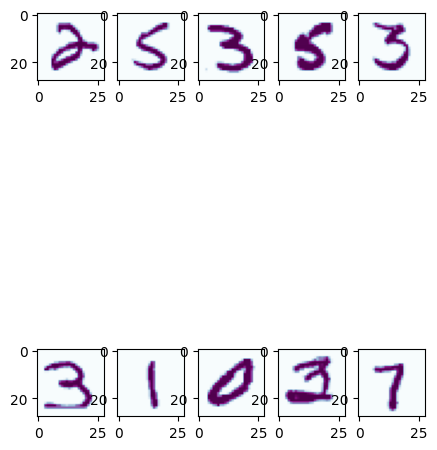

In [8]:
plt.figure(figsize=(5,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    
    plt.imshow(samples[i][0],cmap='BuPu')
plt.show()

In [9]:
optimizer = adam_optimizer(model, lr=1e-2)
criterion = cross_entropy_loss()
num_epochs = 50

In [10]:
model, log_dict = train_model(model, train_loader, test_loader, optimizer, criterion, num_epochs)
torch.save(model, './models/model1.pth')

Epoch : 1/50


[1,  1875] loss: 0.266, accuracy: 0.922
Epoch : 2/50
[2,  1875] loss: 0.172, accuracy: 0.953
Epoch : 3/50
[3,  1875] loss: 0.150, accuracy: 0.959
Epoch : 4/50
[4,  1875] loss: 0.135, accuracy: 0.964
Epoch : 5/50
[5,  1875] loss: 0.132, accuracy: 0.966
Epoch : 6/50
[6,  1875] loss: 0.118, accuracy: 0.969
Epoch : 7/50
[7,  1875] loss: 0.120, accuracy: 0.971
Epoch : 8/50
[8,  1875] loss: 0.108, accuracy: 0.973
Epoch : 9/50
[9,  1875] loss: 0.104, accuracy: 0.975
Epoch : 10/50
[10,  1875] loss: 0.103, accuracy: 0.975
Epoch : 11/50
[11,  1875] loss: 0.093, accuracy: 0.978
Epoch : 12/50
[12,  1875] loss: 0.098, accuracy: 0.977
Epoch : 13/50
[13,  1875] loss: 0.094, accuracy: 0.978
Epoch : 14/50
[14,  1875] loss: 0.082, accuracy: 0.980
Epoch : 15/50
[15,  1875] loss: 0.087, accuracy: 0.980
Epoch : 16/50
[16,  1875] loss: 0.089, accuracy: 0.980
Epoch : 17/50
[17,  1875] loss: 0.088, accuracy: 0.980
Epoch : 18/50
[18,  1875] loss: 0.088, accuracy: 0.980
Epoch : 19/50
[19,  1875] loss: 0.085, ac

In [12]:
loaded_model = torch.load('./models/model1.pth')
model.load_state_dict(loaded_model.state_dict())

<All keys matched successfully>

In [13]:
train_losses = log_dict['train_loss_per_epoch']
train_accuracies = log_dict['train_accuracy_per_epoch']
val_losses = log_dict['test_loss_per_epoch']
val_accuracies = log_dict['test_accuracy_per_epoch']

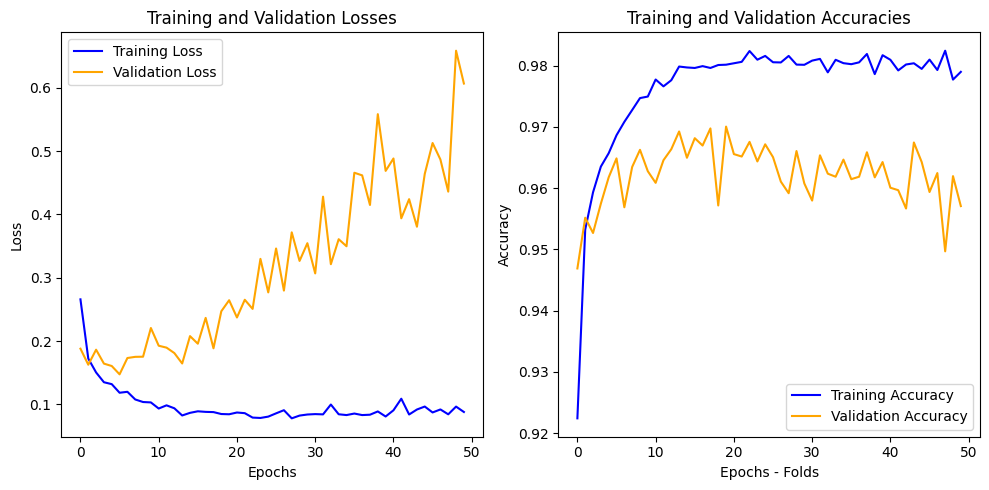

In [14]:
visualization(train_losses, train_accuracies, val_losses, val_accuracies)